During the interviews conducted with the tephrochronology community, one repeated need was being able to assess if the geochemical analyses were comparable or no. 

At present, this question is answered by geochemists by the analysis of secondary standards along with the samples, which allows to understand how comparable are the measurements among laboratories. These secondary standars correspond to specific material (rocks,volcanic glass) for which their chemical composition is "known" and ideally "certified" (e.g. [Jochum et al., 2006](https://doir.org/0.1029/2005GC001060)). The samples and standards are analyzed in batches which are indicated in the dataset under the attribute "MeasurementRun", which links both files in the dataset: TephraDataSet.csv and MeasurementRuns.cv

Two kind of metrics are more routinely calculated to assess the quality of the analyses:

-	**Accuracy** (1). Refers to how close to the “known” or "certified" value is to the analized value. To estimate the accuracy of an analysis, the average analyzed value of each element of each geostandard are compared to the certified values. Values closer to one are more accurate. 


-	**Precision** (2). Refers to the expected dispersion of the analyzed values. In order to being able to compare the precision of the analysis of different elements (which can have very different concentrations in a sample), the relative standard deviation for each element (RSD = average/1SD)*100) is calculated.

In [1]:
#Load the data and filter the data analyzed for geochemistry for which the secondary standards information is available.
# Retrieve the data as a geopandas dataframe

import geopandas as geopd
from owslib.wfs import WebFeatureService
from requests import Request

wfs_server = 'https://data.ipsl.fr/geoserver/tephra/ows'
wfs = WebFeatureService(url=wfs_server, version='1.1.0')
layer = list(wfs.contents)[0]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', wfs_server, params=params).prepare().url

# Read data from URL
BOOM_geodf = geopd.read_file(q, encoding="latin1")

print('\033[1m'+ 'Samples analyzed for geochemical composition'+ '\033[0m')
print(len(BOOM_geodf[BOOM_geodf['properties.TypeOfRegister']!='Organic matter']))

#filter sample observations for which the geostndar information is not included in the BOO TephraDataSet
BOOM_with_geostandards = BOOM_geodf.dropna(subset = ['properties.MeasurementRun']).copy()
BOOM_with_geostandards.loc[:,'properties.MeasurementRun'] = BOOM_with_geostandards.loc[:,'properties.MeasurementRun'].astype('str')

Samples analyzed for geochemical composition
13686


In [4]:
# Load data of geostandards analyzed in each run (ID of the geostandard (e.g. ATHO-G, ML3B-G), 
#     the average analyzed value for each analyzed element, its standard deviation (SD), 
#     the relative standard deviation (RSD) and the number of analyses performed for of each standard (n).

BOOM_geostandards = pd.read_excel('../Data/MeasurementRuns.xlsx')
BOOM_geostandards.loc[:,'MeasurementRun'] = BOOM_geostandards.loc[:,'MeasurementRun'].astype('str')
print('\033[1m'+ 'Number of sample observations analyzed for geochemical composition, for which the average, std and n analyzed for each element for each geostandard analyzed along with the samples, are included in the BOOM TephraDataSet'+ '\033[0m')
print(len(BOOM_with_geostandards[BOOM_with_geostandards.MeasurementRun.isin(BOOM_geostandards[BOOM_geostandards.n!= 'Not reported'].MeasurementRun.unique().tolist())]))
print(' ')

print('\033[1m'+ 'Number of sample observations analyzed for geochemical composition, for which only the average of the geostandard are included in the BOOM TephraDataSet '+ '\033[0m')
print(len(BOOM_with_geostandards[BOOM_with_geostandards.MeasurementRun.isin(BOOM_geostandards[BOOM_geostandards.n== 'Not reported'].MeasurementRun.unique().tolist())]))

Number of sample observations analyzed for geochemical composition, for which the average, std and n analyzed for each element for each geostandard analyzed along with the samples, are included in the BOOM TephraDataSet
9146
 
Number of sample observations analyzed for geochemical composition, for which only the average of the geostandard are included in the BOOM TephraDataSet 
134


Unfortunately, not all the geostandards reported in the literature contained in the BOOM TephraDataset have certified values. In those cases, it is not possible to estimate the precision and accuracy of the analyses, as there is no reference to compare to.

Thus, in order to estimate the precision and the accuracy of the analyses, it is necesary to filter the sample observations for which the geostandards analyzed alogn with the samples have no certified values.

The geostandards with certified values in the dataset correspond to geostandars certified by Jochum et al., 2006 or by the providers of the standards (e.g. OREAS).
The certifed values can be accessed a:

- [Georem](http://georem.mpch-mainz.gwdg.de/)
- [OREAS184](https://www.oreas.com/crm/oreas-184/)
- [oreas700](https://www.oreas.com/crm/oreas-700/)
- [SY-4](https://www.nrcan.gc.ca/our-natural-resources/minerals-mining/mining-resources/sy-4-diorite-gneiss/8025)


In [5]:
#Load Standard reference values and filter the ones with error as '95%CL' or 'SD' which correspond to the standars
#with a certified value.
 
BOOM_geostandards_ref = pd.read_excel('../Data/Standards_Reference.xlsx')
BOOM_geostandards_ref = BOOM_geostandards_ref[BOOM_geostandards_ref.StandardID.isin(['OREAS184', 'GOR132-G', 'GOR128-G', 'OREAS700',
        'BIR-1', 'BHVO-2', 'BHVO-1', 'SY-4', 'KL2-G', 'ML3B-G', 'W-2', 'BCR-2', 'BCR-2G', 'JA-2',
        'T1-G', 'AGV-2', 'StHs6/80-G', 'JA-1', 'NIST610', 'ATHO-G'])].copy()

#Print certified secondary standards in the dataset
temp1 = BOOM_geostandards_ref.StandardID.unique().tolist()
print('\033[1m'+ 'Certified geostandards included in the BOOM TephraDataSet'+ '\033[0m')
print(temp1)

#print MeasurementRuns with certified standards
temp2 = BOOM_geostandards[BOOM_geostandards.StandardID.isin(temp1)].MeasurementRun.unique().tolist()
print(" ")
print('\033[1m'+ 'Measurement Runs with certified geostandards'+ '\033[0m')
print(temp2)

print(" ")
print('\033[1m'+ 'Number of sample observations analyzed along with certified geostandards'+ '\033[0m')
temp3 = BOOM_geostandards[BOOM_geostandards.StandardID.isin(temp1)]
temp4 = temp3[((temp3.SiO2!=-1)&(temp3.SD_SiO2!=-1))|((temp3.Rb!=-1)&(temp3.SD_Rb!=-1))].MeasurementRun.unique().tolist()
print(len(BOOM_with_geostandards[BOOM_with_geostandards.MeasurementRun.isin(temp4)].MeasurementRun))

print(" ")
print('\033[1m'+ 'Number of sample observations analyzed along with certified geostandards, where the mean, std and number of analyses is included in the BOOM TephraDataSet'+ '\033[0m')
temp5 = temp3[temp3.n!='Not reported'].MeasurementRun.unique()
print(len(BOOM_with_geostandards[BOOM_with_geostandards.MeasurementRun.isin(temp5)].MeasurementRun))

Certified geostandards included in the BOOM TephraDataSet
['OREAS184', 'GOR132-G', 'GOR128-G', 'OREAS700', 'BIR-1', 'BHVO-2', 'BHVO-1', 'SY-4', 'KL2-G', 'ML3B-G', 'W-2', 'BCR-2', 'BCR-2G', 'JA-2', 'T1-G', 'AGV-2', 'StHs6/80-G', 'JA-1', 'NIST610', 'ATHO-G']
 
Measurement Runs with certified geostandards
['Rawson2016', '100415', '220115', '230115', 'mr060912', 'mr070912', '100912', '11112', '021112', '61112', '081112', '40413', '050413', '080713', '100713', '120713', '211013', '221013', '131213', '210114', '220114', '140214', '190314', '200314', '210314', '230714', '240714', '250714', '190115', '200115', '130415', '23-Ago-12', '19-Abr-13', 'AllowayMay2014', '8-may-15', '16-abr-13', '12-sept-14', '31-oct-15', 'Geoffroy2018Trace', 'Geoffroy2018Major10um', 'Geoffroy2018MajorSpot', 'Geoffroy2018TracePBN', 'Carel2011Sept', 'Carel2011Dec', '260117', '50717', '231017', '270118', '200318', '050318', '190816', '240117', '250117', '270217', '280217', 'AllowaySOLICPMS2015', 'DelCarlo2018LAICPMS', '

In [6]:
import sys
sys.path.insert(1, '../Scripts')
from functions import estimating_accuracy, plot_accuracy_MeasurementRun

# Estimating accuracy
BOOM_geostandards_accuracy = estimating_accuracy(BOOM_geostandards,BOOM_geostandards_ref)

# Plotting accuracy by each Measurement Run 
#plot_accuracy_MeasurementRun(BOOM_geostandards_accuracy,save=False)

If you want to check some specific Measurement Run you can do the following, in the example we want to plot runs 11112 and 021112 as ['11112','021112']. 

As many specific runs can be added, for example if we want to additionally print Rawson2016, we would write:

eg. ['11112','021112','Rawson2016].

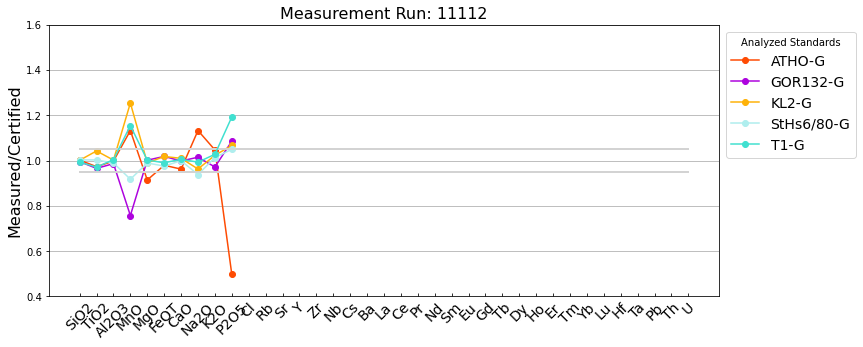

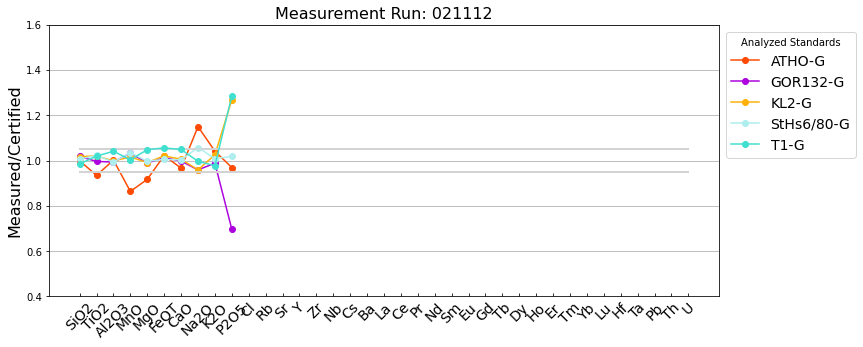

In [7]:
plot_accuracy_MeasurementRun(BOOM_geostandards_accuracy[BOOM_geostandards_accuracy.MeasurementRun.isin(['11112','021112'])])

If you want to check for a specific sample and change the yaxis limits: 

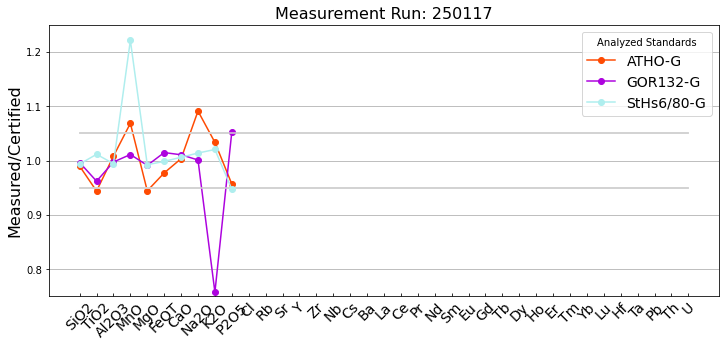

In [8]:
plot_accuracy_MeasurementRun(BOOM_geostandards_accuracy[BOOM_geostandards_accuracy.MeasurementRun.isin(BOOM_with_geostandards[BOOM_with_geostandards.SampleID == 'T-44'].MeasurementRun.unique())],
             ymin=0.75,ymax=1.25)

If no certified secondary standards information is available, nothing will be plotted:

In [9]:
plot_accuracy_MeasurementRun(BOOM_geostandards_accuracy[BOOM_geostandards_accuracy.MeasurementRun.isin(BOOM_with_geostandards[BOOM_with_geostandards.SampleID == 'JK193'].MeasurementRun.unique())])

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


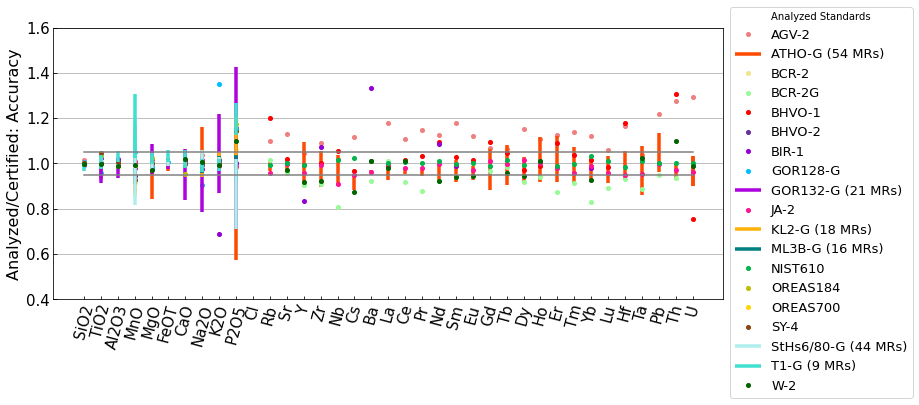

In [10]:
from functions import estimating_accuracy, plot_accuracy_BOOM

plot_accuracy_BOOM(BOOM_geostandards_accuracy,save=False)

In [11]:
print('\033[1m'+ 'Accuracies Summary'+ '\033[0m')
print(" ")

for elemento in ['SiO2','TiO2','Al2O3','MnO','MgO','FeOT','CaO','Na2O','K2O','P2O5','Cl',
                             'Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb',
                             'Dy','Ho','Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']:
    print('\033[1m'+ elemento + '\033[0m')
    print('Min: {}, Max: {}, Mean: {}, STD: {}'.format(BOOM_geostandards_accuracy[elemento].min(),BOOM_geostandards_accuracy[elemento].max(),BOOM_geostandards_accuracy[elemento].mean(),BOOM_geostandards_accuracy[elemento].std()))
    print(" ")      

Accuracies Summary
 
SiO2
Min: 0.9581672354948807, Max: 1.0179736263736263, Mean: 0.9968397192892239, STD: 0.008410948610183017
 
TiO2
Min: 0.8737291212781411, Max: 1.0749019607843138, Mean: 0.9895618467688585, STD: 0.038621234931344915
 
Al2O3
Min: 0.897009090909091, Max: 1.055993177387914, Mean: 0.9989989151738062, STD: 0.020442303940319036
 
MnO
Min: 0.6603773584905661, Max: 1.6421052631578947, Mean: 1.0080795330989374, STD: 0.14211745777663384
 
MgO
Min: 0.6882524271844661, Max: 1.1592857142857143, Mean: 0.9745640123343727, STD: 0.06227391347471581
 
FeOT
Min: 0.9113149847094801, Max: 1.0573408385093168, Mean: 1.0017853345062622, STD: 0.021737519874320817
 
CaO
Min: 0.7215095332018411, Max: 1.0567136150234742, Mean: 0.9934762895872679, STD: 0.04391907659184198
 
Na2O
Min: 0.6371084337349399, Max: 1.1949600000000002, Mean: 1.0094393397610921, STD: 0.08642464762143856
 
K2O
Min: 0.689655172413793, Max: 1.4545454545454546, Mean: 1.0247013274827064, STD: 0.07481099498068519
 
P2O5
Min:

In [12]:
#plot_RSD_MeasumentRun(BOOM_geostandards,save=False)

If you want to check some specific Measurement run you can do the following, adding as many specific runs you want:

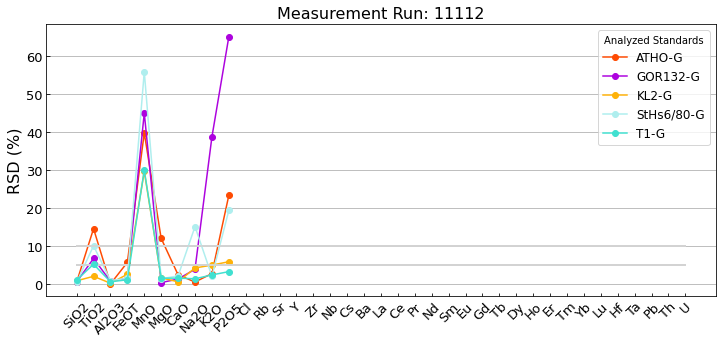

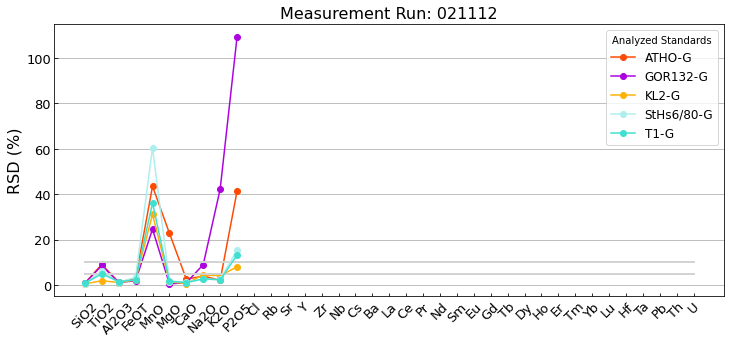

In [13]:
from functions import plot_RSD_MeasurementRun

plot_RSD_MeasurementRun(BOOM_geostandards[BOOM_geostandards.MeasurementRun.isin(['11112','021112'])])

If you want to check for a specific sample (e.g. JK193) and change the yaxis limits (e.g. ymin=0,ymax=120):


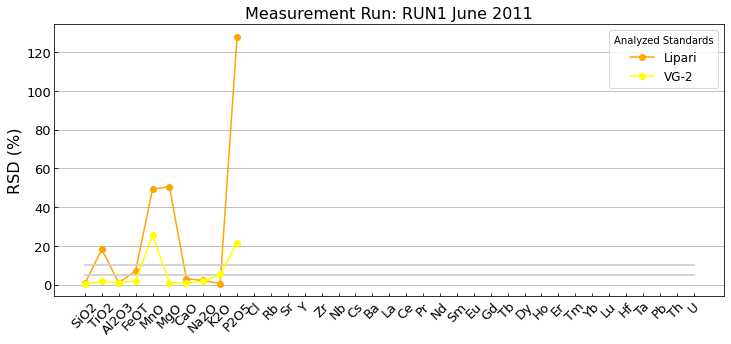

In [14]:
plot_RSD_MeasurementRun(BOOM_geostandards[BOOM_geostandards.MeasurementRun.isin(BOOM_with_geostandards[BOOM_with_geostandards.SampleID == 'JK193'].MeasurementRun.unique())],ymin=0,ymax=120)

C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\consue\anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\c

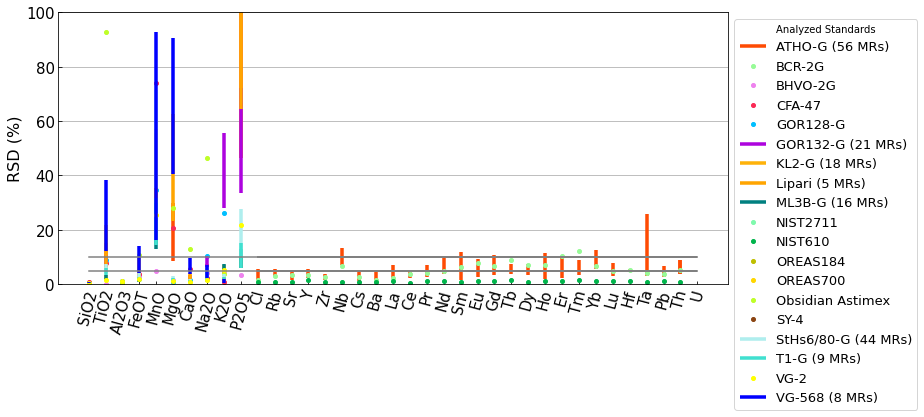

In [15]:
from functions import plot_RSD_BOOM

plot_RSD_BOOM(BOOM_geostandards,ymin = 0, ymax= 100)

In [16]:
print('\033[1m'+ 'Precision Summary'+ '\033[0m')
print(" ")

for elemento in ['SiO2','TiO2','Al2O3','MnO','MgO','FeOT','CaO','Na2O','K2O','P2O5','Cl',
                             'Rb','Sr','Y','Zr','Nb','Cs','Ba','La','Ce','Pr','Nd','Sm','Eu','Gd','Tb',
                             'Dy','Ho','Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb', 'Th', 'U']:
    print('\033[1m'+ elemento + '\033[0m')
    print('Min: {}, Max: {}, Mean: {}, STD: {}'.format(BOOM_geostandards['RSD_'+elemento].min(),BOOM_geostandards['RSD_'+elemento].max(),BOOM_geostandards['RSD_'+elemento].mean(),BOOM_geostandards['RSD_'+elemento].std()))
    print(" ")  

Precision Summary
 
SiO2
Min: 0.09468654952839543, Max: 1.5420415670156593, Mean: 0.566714245025058, STD: 0.3007494375858342
 
TiO2
Min: 0.20737061399698173, Max: 92.66986344822213, Mean: 8.494873294757289, STD: 8.958888518360803
 
Al2O3
Min: 0.10935939754436864, Max: 2.8325328908544765, Mean: 0.9660351228510135, STD: 0.41929577123263206
 
MnO
Min: 0.0, Max: 141.4213562373095, Mean: 38.52302412390075, STD: 21.65374209917989
 
MgO
Min: 0.21119868020783694, Max: 100.0, Mean: 10.713702313817631, STD: 17.39650989431688
 
FeOT
Min: 0.5743856561053042, Max: 18.51851851851852, Mean: 3.2333267983455736, STD: 2.2599163083609524
 
CaO
Min: 0.37328744554895427, Max: 13.07390215497111, Mean: 1.938106189410595, STD: 1.7178979206848177
 
Na2O
Min: 0.44978694054678, Max: 46.56305929775874, Mean: 4.835936380821295, STD: 4.1631490817524694
 
K2O
Min: 0.15391894054828145, Max: 74.81666255342545, Mean: 7.817908577136553, STD: 13.380811708168867
 
P2O5
Min: 3.338568197883989, Max: 206.16902854251938, Mean